# Logistic regression for multi-class classification

## import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [21]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [22]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [50]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [24]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [25]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [26]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

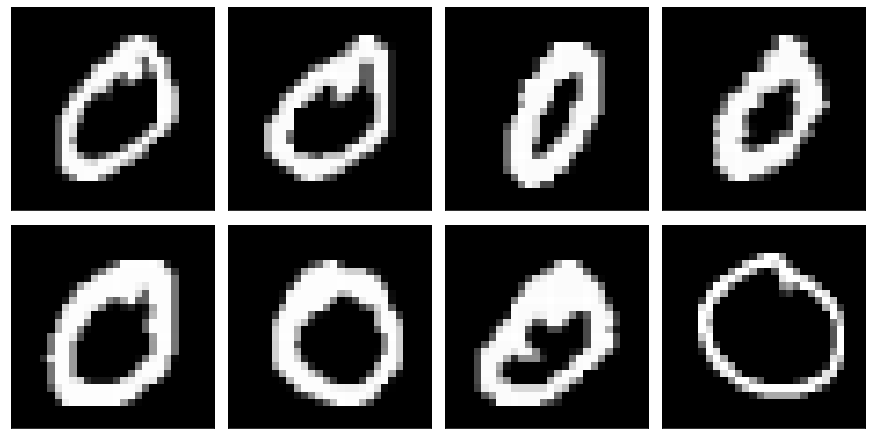

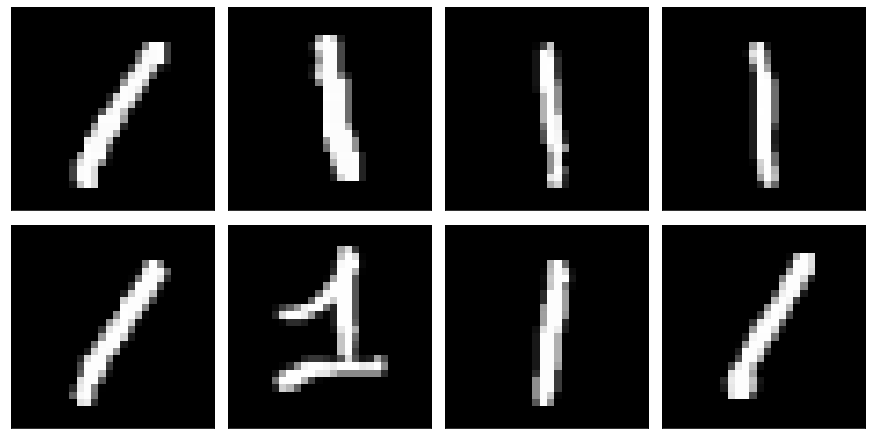

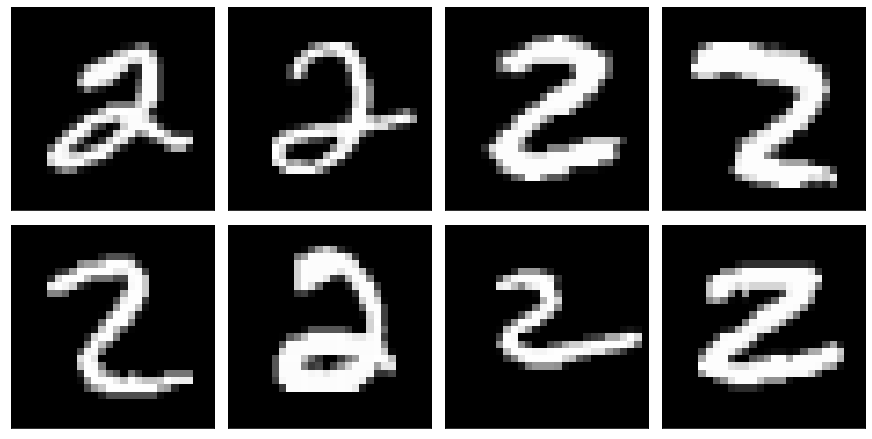

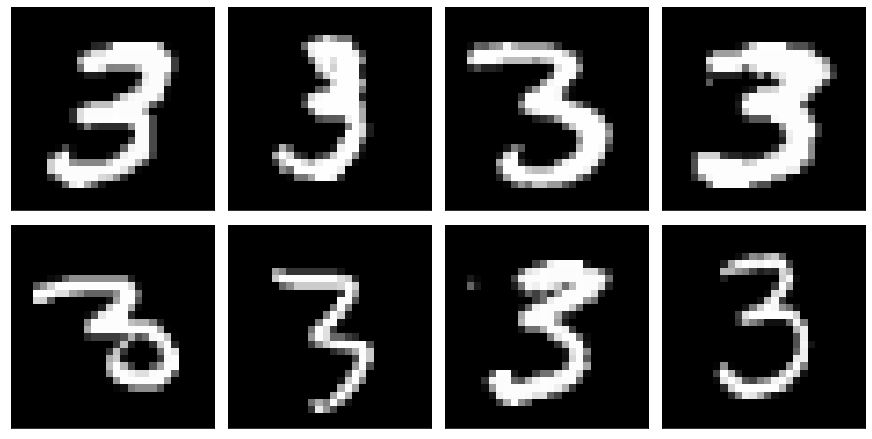

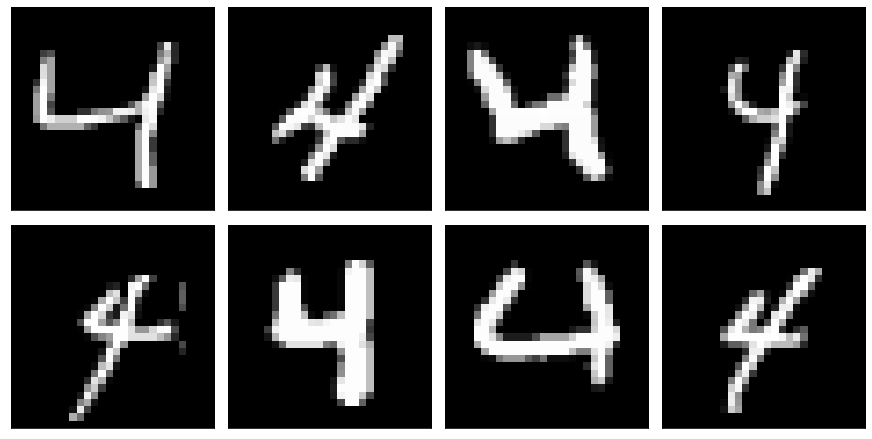

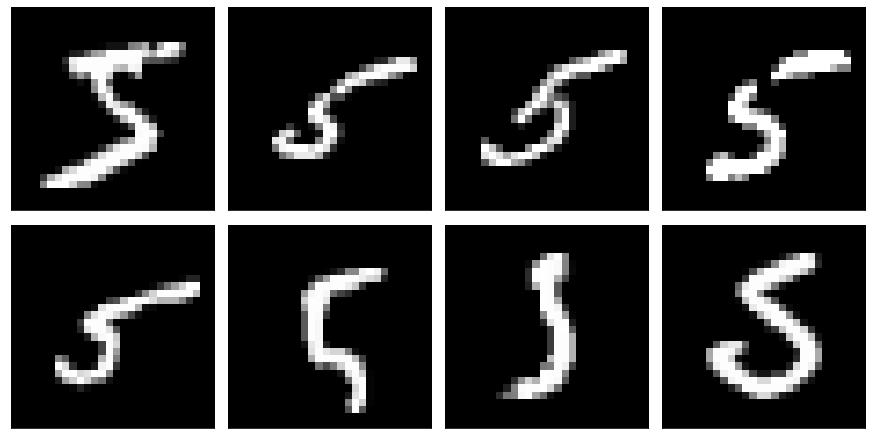

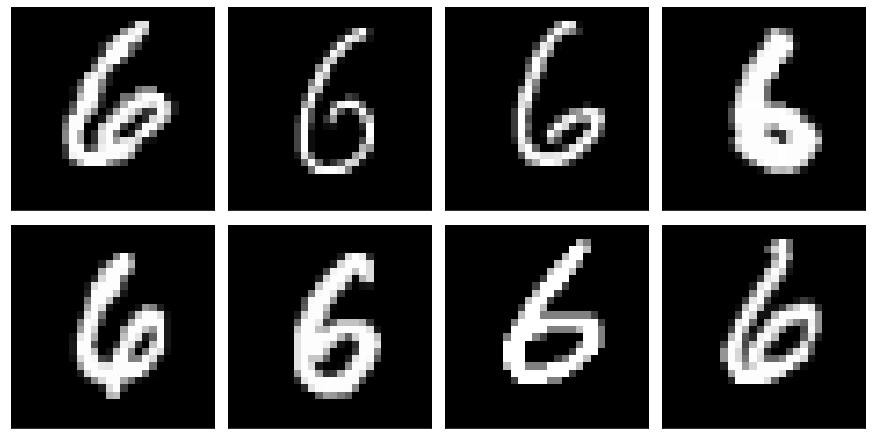

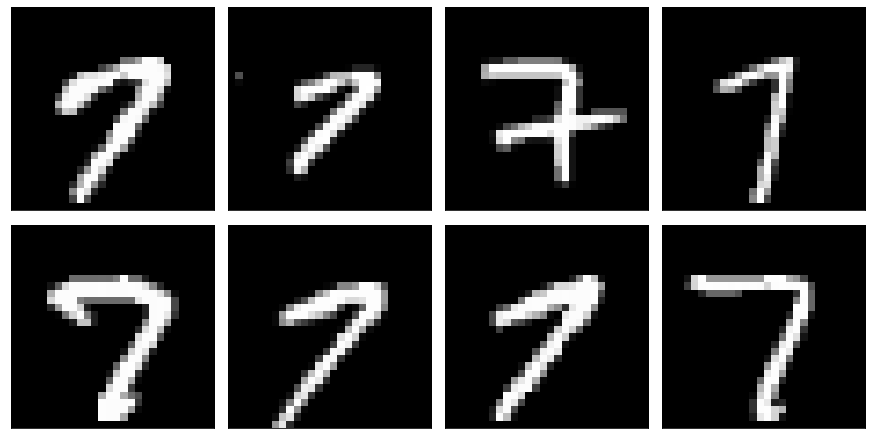

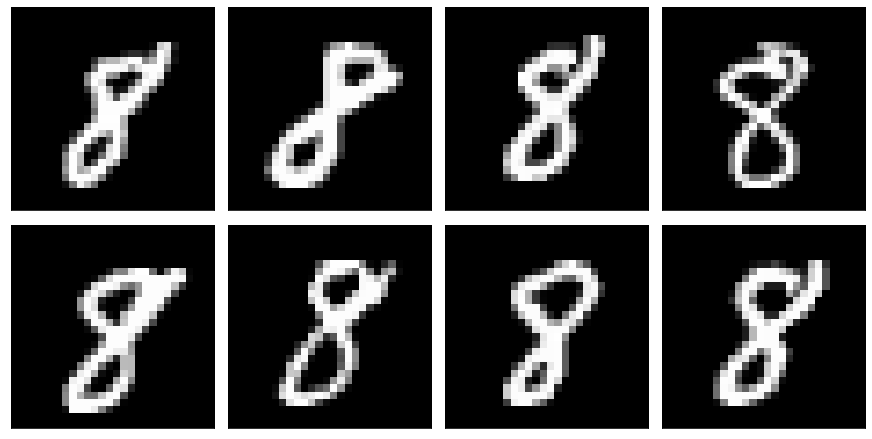

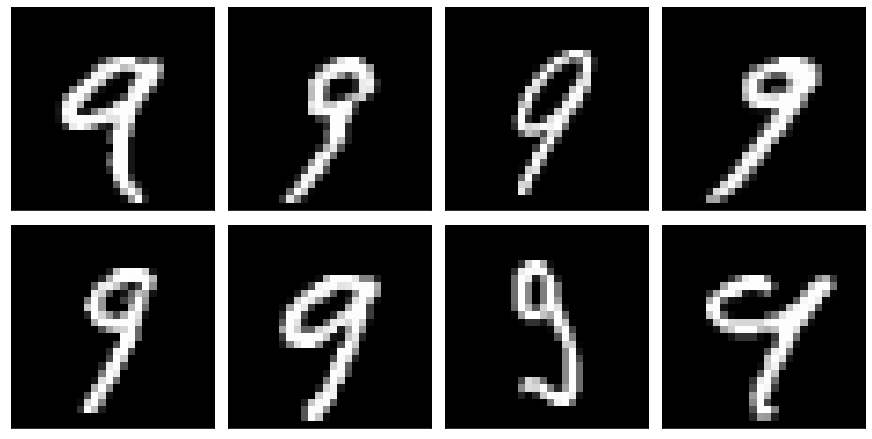

In [27]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [28]:
def layer_linear(input, weight):
    output = input.dot(weight.T)
    return output

## Softmax function

In [29]:
def activation_softmax(input):
    output = np.exp(input)
    for i in range(len(input)):
      output[i] /= output[i].sum()
    return output

## compute prediction by the forward propagation of the neural network

In [30]:
def compute_prediction(input, weight):
    output      = layer_linear(input, weight)
    prediction  = activation_softmax(output)
    return prediction

## compute loss for the cross-entropy term

In [31]:
def compute_loss_cross_entropy(prediction, label):
    loss = np.mean(-label*np.log(prediction))*prediction.shape[1]
    return loss

## compute loss for the regularization term

In [32]:
def compute_loss_regularization(alpha, weight):
    loss = alpha * np.sum(weight**2) / 2
    return loss

## compute loss function

In [33]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction, label) + compute_loss_regularization(alpha, weight)
    
    return loss

## compute gradient for the cross-entropy term

In [34]:
def compute_gradient_cross_entropy(input, prediction, label):
    gradient = (prediction - label).T.dot(input)/input.shape[0]
    return gradient

## compute gradient for the regularization term

In [58]:
def compute_gradient_regularization(alpha, weight):
    gradient = alpha * weight
    return gradient

## compute gradient

In [36]:
def compute_gradient(input, prediction, label, alpha, weight):
    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(alpha, weight)
    return gradient

## compute accuracy

In [37]:
def compute_accuracy(prediction, label):
    bCorrect = [1 if prediction[i].argmax() == label[i].argmax() else 0 for i in range(prediction.shape[0])]
    accuracy    = np.sum(bCorrect) / len(label)
    return accuracy

## consider bias in the data

In [39]:
one_train   = np.ones((num_data_train, 1))
one_test    = np.ones((num_data_test, 1))

vector_x_train_bias = np.append(vector_x_train, one_train, axis=1)
vector_x_test_bias  = np.append(vector_x_test, one_test, axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [52]:
def get_weight(dim_input, dim_output):
    weight = np.ones((dim_output, dim_input + 1))
    weight[:,:] = 0.001
    weight[:,dim_input] = 1
    return weight

In [53]:
dim_input   = vector_x_train.shape[1]
dim_output  = y_train.shape[1]

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [54]:
number_iteration    = 1000
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]
list_weight_decay   = [0.001, 0.01, 0.1]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [55]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [56]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [86]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = x_test.shape[0] // size_minibatch
    alpha           = 0

    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(dim_input, dim_output)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch:(j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_train_bias
        label   = y_train

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = compute_loss(prediction, label, alpha, weight)
        test_accuracy_minibatch[k, i]   = compute_accuracy(prediction, label)

  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size =  50, alpha = 0.000


  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.000


  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size = 200, alpha = 0.000


100%|██████████| 1000/1000 [04:54<00:00,  3.40it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [87]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = x_test.shape[0] // size_minibatch
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(dim_input, dim_output)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch:(j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_train_bias
        label   = y_train

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = compute_loss(prediction, label, alpha, weight)
        test_accuracy_weight_decay[k, i]   = compute_accuracy(prediction, label)

  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.001


  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.010


  0%|          | 0/1000 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.100


100%|██████████| 1000/1000 [05:35<00:00,  2.98it/s]


## plot curve

In [88]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [89]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [90]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [91]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [92]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

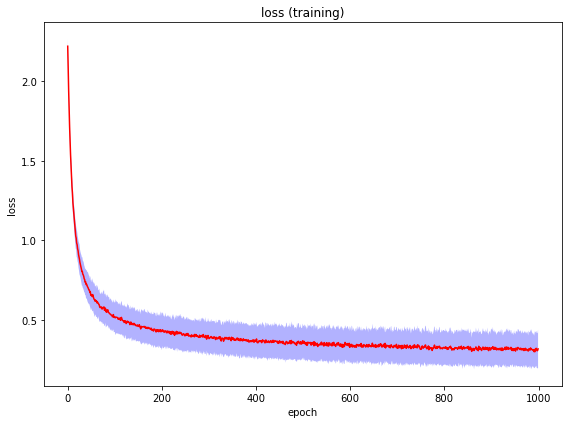

In [93]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

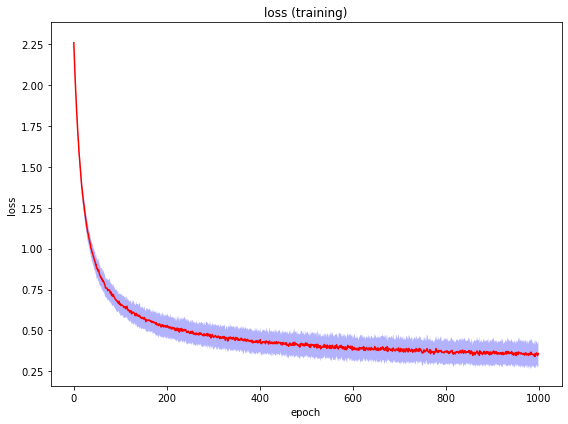

In [94]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

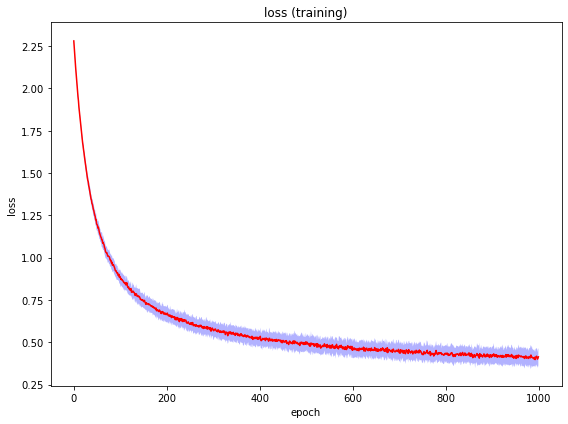

In [96]:

plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

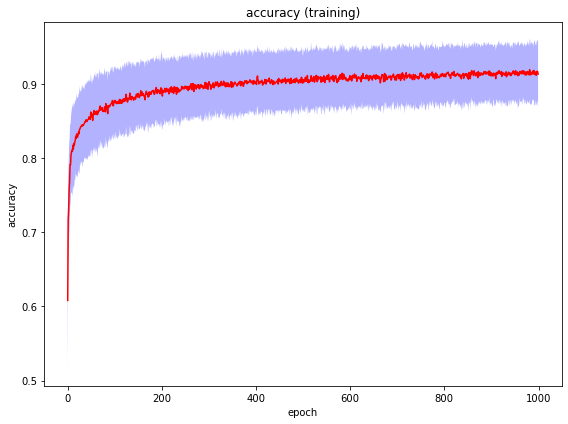

In [97]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

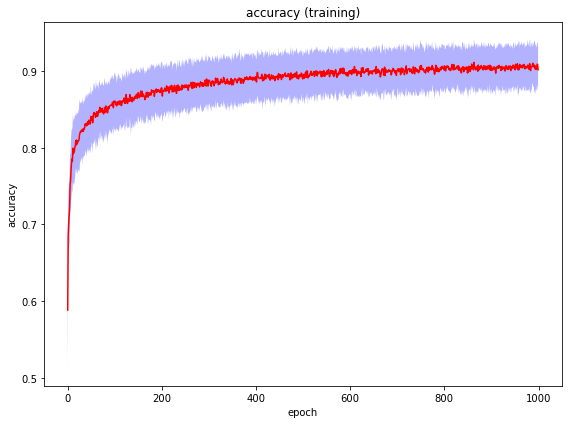

In [98]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

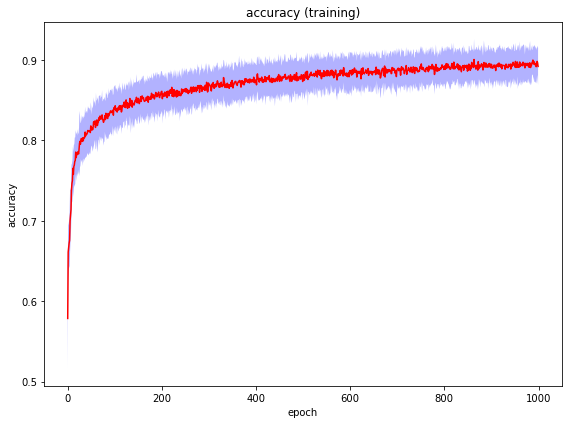

In [99]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

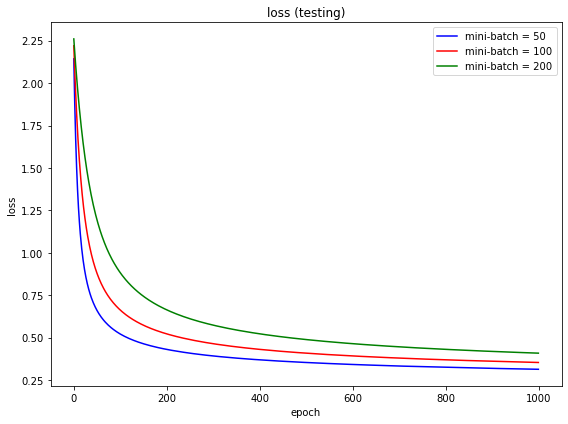

In [100]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

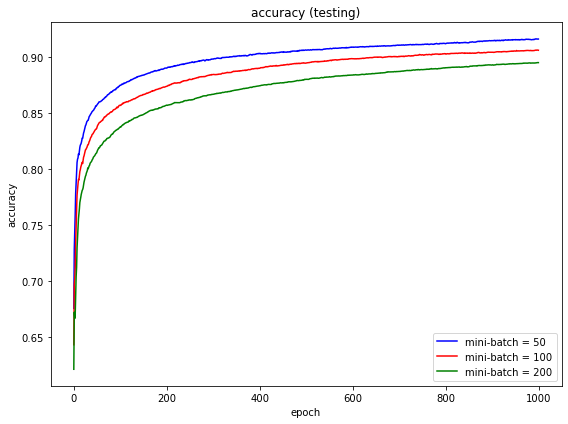

In [101]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

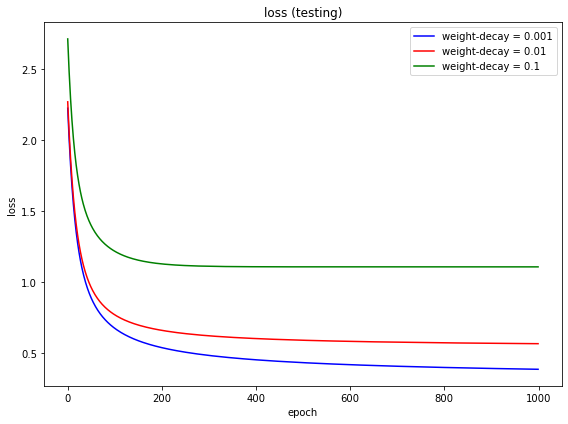

In [102]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

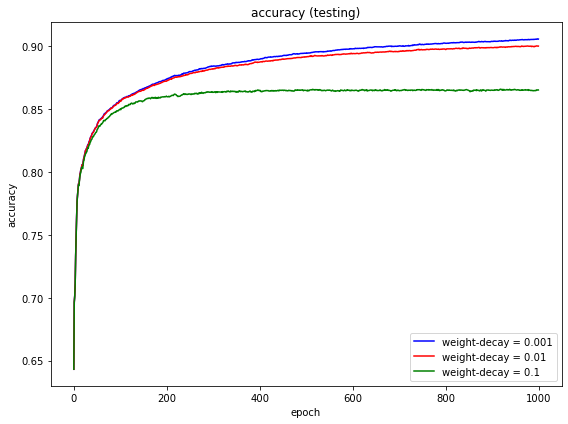

In [105]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [106]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [107]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [108]:
print_curve(train_loss_mean_minibatch[0], index)

index =    0, value = 2.2192367083
index =  100, value = 0.5161276369
index =  200, value = 0.4295019729
index =  300, value = 0.3830281782
index =  400, value = 0.3672836174
index =  500, value = 0.3641092033
index =  600, value = 0.3462186078
index =  700, value = 0.3218293199
index =  800, value = 0.3242250692
index =  900, value = 0.3205368134


## training loss (mean) : mini-batch = 100, weight-decay = 0

In [109]:
print_curve(train_loss_mean_minibatch[1], index)

index =    0, value = 2.2595943955
index =  100, value = 0.6594605216
index =  200, value = 0.5212159887
index =  300, value = 0.4575863573
index =  400, value = 0.4295590507
index =  500, value = 0.4181088773
index =  600, value = 0.3947205654
index =  700, value = 0.3694419429
index =  800, value = 0.3678957334
index =  900, value = 0.3612764617


## training loss (mean) : mini-batch = 200, weight-decay = 0

In [110]:
print_curve(train_loss_mean_minibatch[2], index)

index =    0, value = 2.2805423998
index =  100, value = 0.8821355345
index =  200, value = 0.6635259190
index =  300, value = 0.5694971162
index =  400, value = 0.5213889557
index =  500, value = 0.4974741265
index =  600, value = 0.4653356000
index =  700, value = 0.4370955790
index =  800, value = 0.4293665730
index =  900, value = 0.4183877980


## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [111]:
print_curve(train_accuracy_mean_minibatch[0], index)

index =    0, value = 0.6082500000
index =  100, value = 0.8773750000
index =  200, value = 0.8937500000
index =  300, value = 0.9036250000
index =  400, value = 0.9030000000
index =  500, value = 0.9028750000
index =  600, value = 0.9066250000
index =  700, value = 0.9131250000
index =  800, value = 0.9140000000
index =  900, value = 0.9155000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [112]:
print_curve(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.5882500000
index =  100, value = 0.8605000000
index =  200, value = 0.8773750000
index =  300, value = 0.8881250000
index =  400, value = 0.8896250000
index =  500, value = 0.8925000000
index =  600, value = 0.8968750000
index =  700, value = 0.9006250000
index =  800, value = 0.9067500000
index =  900, value = 0.9055000000


## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [113]:
print_curve(train_accuracy_mean_minibatch[2], index)

index =    0, value = 0.5786250000
index =  100, value = 0.8418750000
index =  200, value = 0.8610000000
index =  300, value = 0.8693750000
index =  400, value = 0.8755000000
index =  500, value = 0.8776250000
index =  600, value = 0.8833750000
index =  700, value = 0.8882500000
index =  800, value = 0.8927500000
index =  900, value = 0.8946250000


## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [114]:
print_curve(train_loss_mean_weight_decay[0], index)

index =    0, value = 2.2646001444
index =  100, value = 0.6710832304
index =  200, value = 0.5370784095
index =  300, value = 0.4766879940
index =  400, value = 0.4511623193
index =  500, value = 0.4417740781
index =  600, value = 0.4203540068
index =  700, value = 0.3971470768
index =  800, value = 0.3969510445
index =  900, value = 0.3917820773


## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [115]:
print_curve(train_loss_mean_weight_decay[1], index)

index =    0, value = 2.3096154200
index =  100, value = 0.7662999336
index =  200, value = 0.6589333038
index =  300, value = 0.6155818575
index =  400, value = 0.6006593577
index =  500, value = 0.5984920200
index =  600, value = 0.5835435445
index =  700, value = 0.5677129152
index =  800, value = 0.5701058339
index =  900, value = 0.5681723421


## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [116]:
print_curve(train_loss_mean_weight_decay[2], index)

index =    0, value = 2.7561772396
index =  100, value = 1.2155288352
index =  200, value = 1.1274775654
index =  300, value = 1.1083700283
index =  400, value = 1.1061646997
index =  500, value = 1.1127274175
index =  600, value = 1.1054320899
index =  700, value = 1.1023714915
index =  800, value = 1.1056465542
index =  900, value = 1.1039174969


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [117]:
print_curve(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.5882500000
index =  100, value = 0.8605000000
index =  200, value = 0.8775000000
index =  300, value = 0.8880000000
index =  400, value = 0.8892500000
index =  500, value = 0.8921250000
index =  600, value = 0.8963750000
index =  700, value = 0.9002500000
index =  800, value = 0.9057500000
index =  900, value = 0.9052500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [118]:
print_curve(train_accuracy_mean_weight_decay[1], index)

index =    0, value = 0.5882500000
index =  100, value = 0.8596250000
index =  200, value = 0.8761250000
index =  300, value = 0.8867500000
index =  400, value = 0.8872500000
index =  500, value = 0.8888750000
index =  600, value = 0.8925000000
index =  700, value = 0.8960000000
index =  800, value = 0.9005000000
index =  900, value = 0.9000000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [119]:
print_curve(train_accuracy_mean_weight_decay[2], index)

index =    0, value = 0.5881250000
index =  100, value = 0.8535000000
index =  200, value = 0.8630000000
index =  300, value = 0.8652500000
index =  400, value = 0.8675000000
index =  500, value = 0.8622500000
index =  600, value = 0.8635000000
index =  700, value = 0.8658750000
index =  800, value = 0.8688750000
index =  900, value = 0.8671250000


## function definition for presenting the results

In [120]:
def function_results_01(data, index_data, nRow, nCol):
    
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [121]:
def function_results_02(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [122]:
def function_results_03(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [123]:
def function_results_04(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [124]:
def function_results_05(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [131]:
def function_results_06(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [132]:
def function_results_07(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [133]:
def function_results_08(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [134]:
def function_results_09(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [135]:
def function_results_10(data, index_data, nRow, nCol):
    function_results_01(data, index_data, nRow, nCol)

In [143]:
def function_results_11(data_mean, data_std, x_label, y_label, title):
  
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [144]:
def function_results_12(data_mean, data_std, x_label, y_label, title):
    function_results_11(data_mean, data_std, x_label, y_label, title)

In [145]:
def function_results_13(data_mean, data_std, x_label, y_label, title):
    function_results_11(data_mean, data_std, x_label, y_label, title)

In [152]:
def function_results_14(data_mean, data_std, x_label, y_label, title):
    function_results_11(data_mean, data_std, x_label, y_label, title)

In [153]:
def function_results_15(data_mean, data_std, x_label, y_label, title):
    function_results_11(data_mean, data_std, x_label, y_label, title)

In [154]:
def function_results_16(data_mean, data_std, x_label, y_label, title):
    function_results_11(data_mean, data_std, x_label, y_label, title)

In [159]:
def function_results_17(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [161]:
def function_results_18(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    function_results_17(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title)

In [162]:
def function_results_19(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    function_results_17(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title)

In [163]:
def function_results_20(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    function_results_17(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title)

In [50]:
def function_results_21(*args):
    
    pass

In [51]:
def function_results_22(*args):
    
    pass

In [52]:
def function_results_23(*args):
    
    pass

In [53]:
def function_results_24(*args):
    
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

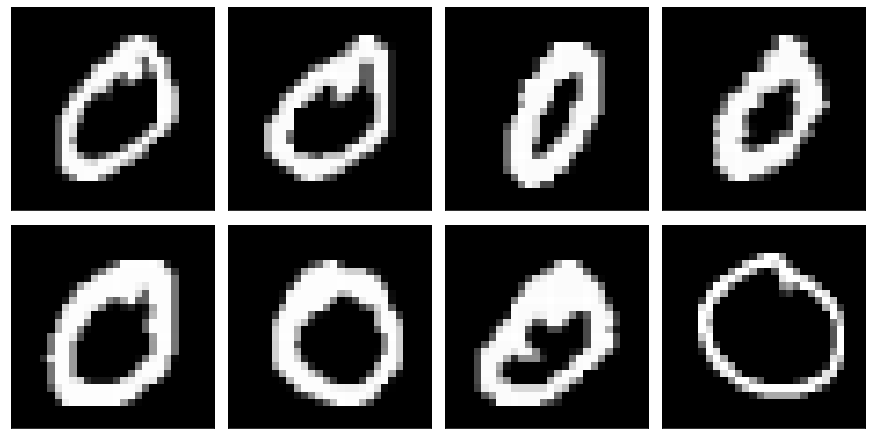

In [125]:
function_results_01(x_train, index_train[0][0][0:nPlot], nRow, nCol)

## # 02. plot the input images for '1'

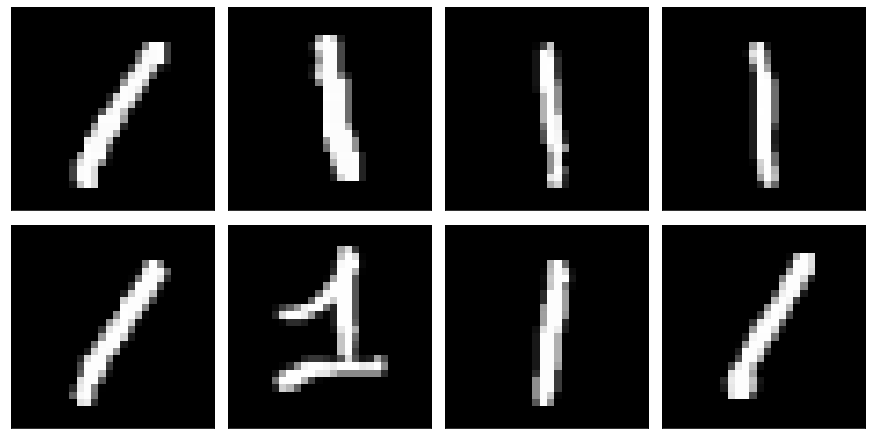

In [126]:
function_results_02(x_train, index_train[1][0][0:nPlot], nRow, nCol)

## # 03. plot the input images for '2'

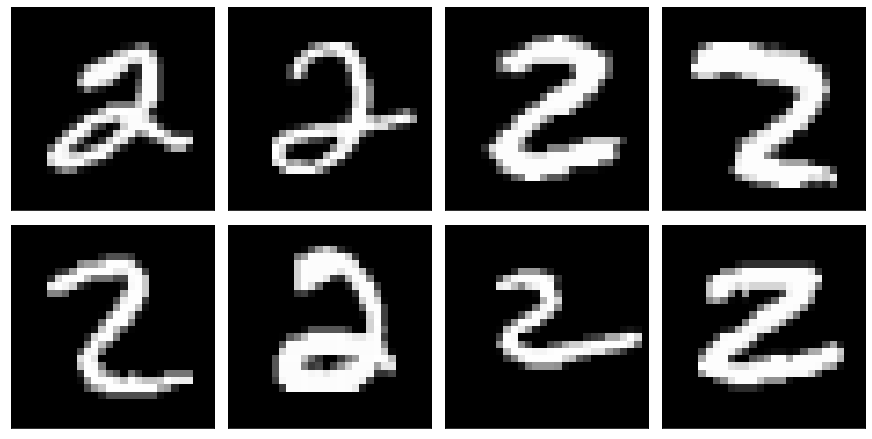

In [127]:
function_results_03(x_train, index_train[2][0][0:nPlot], nRow, nCol)

## # 04. plot the input images for '3'

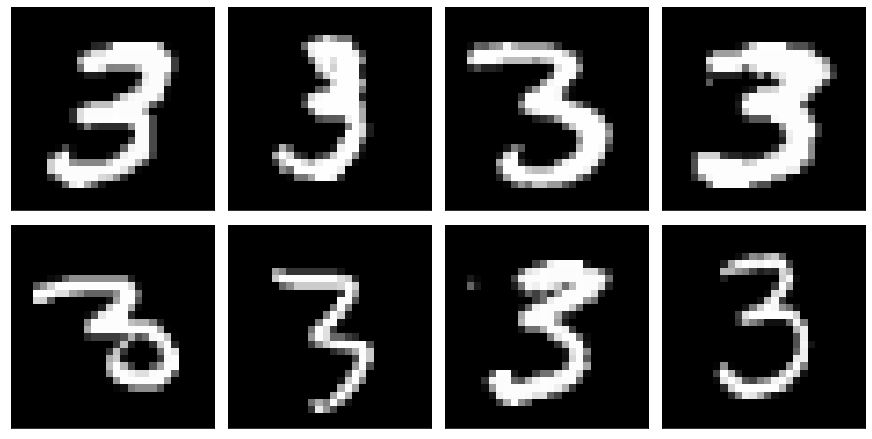

In [128]:
function_results_04(x_train, index_train[3][0][0:nPlot], nRow, nCol)

## # 05. plot the input images for '4'

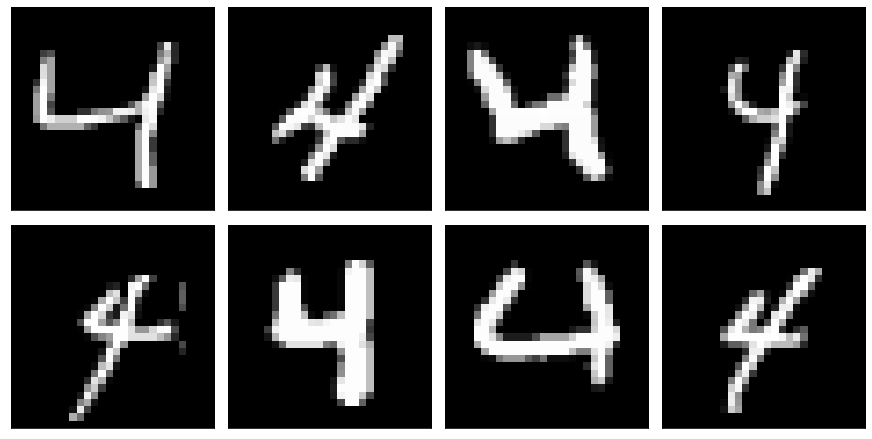

In [129]:
function_results_05(x_train, index_train[4][0][0:nPlot], nRow, nCol)

## # 06. plot the input images for '5'

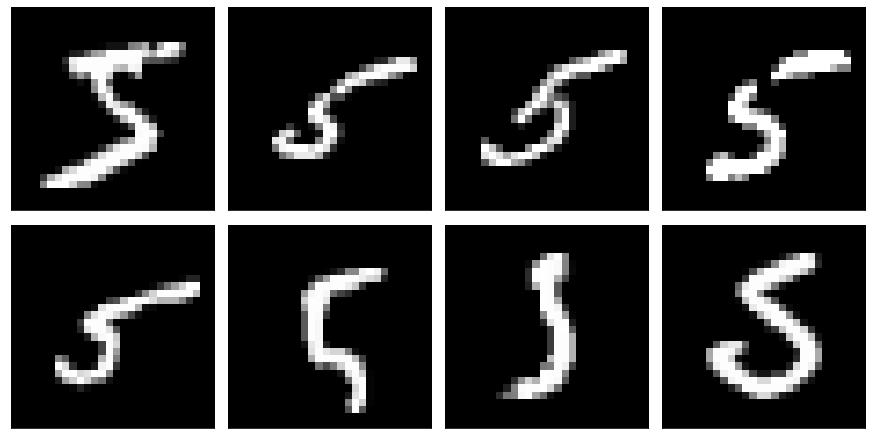

In [136]:
function_results_06(x_train, index_train[5][0][0:nPlot], nRow, nCol)

## # 07. plot the input images for '6'

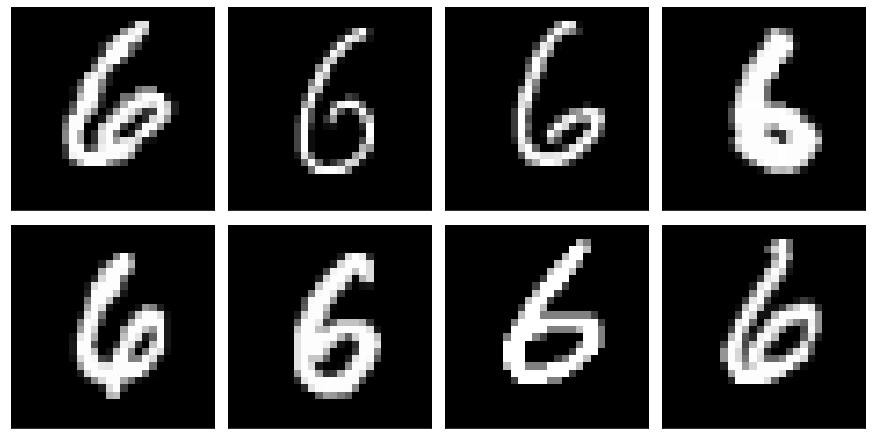

In [137]:
function_results_07(x_train, index_train[6][0][0:nPlot], nRow, nCol)

## # 08. plot the input images for '7'

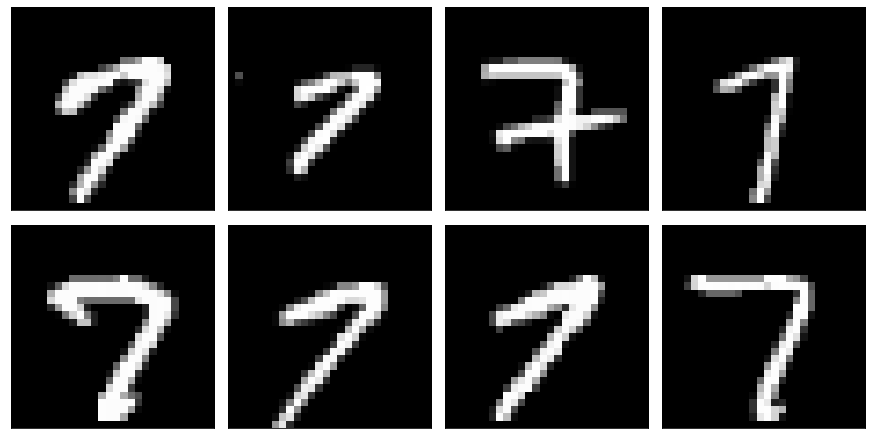

In [138]:
function_results_08(x_train, index_train[7][0][0:nPlot], nRow, nCol)

## # 09. plot the input images for '8'

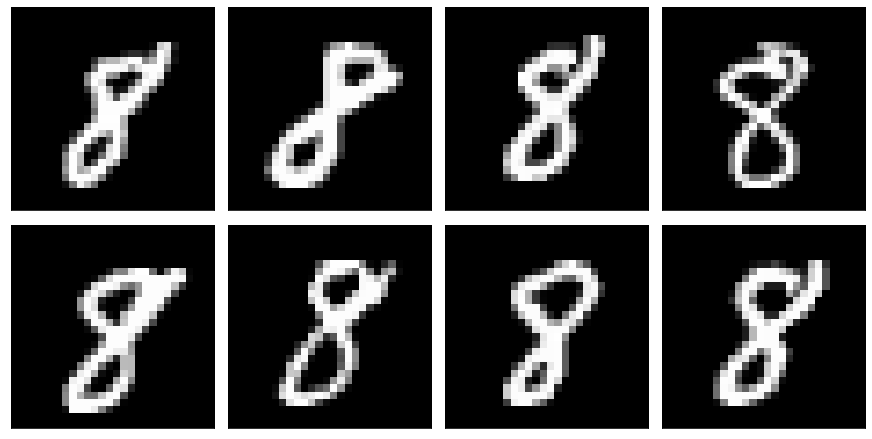

In [139]:
function_results_09(x_train, index_train[8][0][0:nPlot], nRow, nCol)

## # 10. plot the input images for '9'

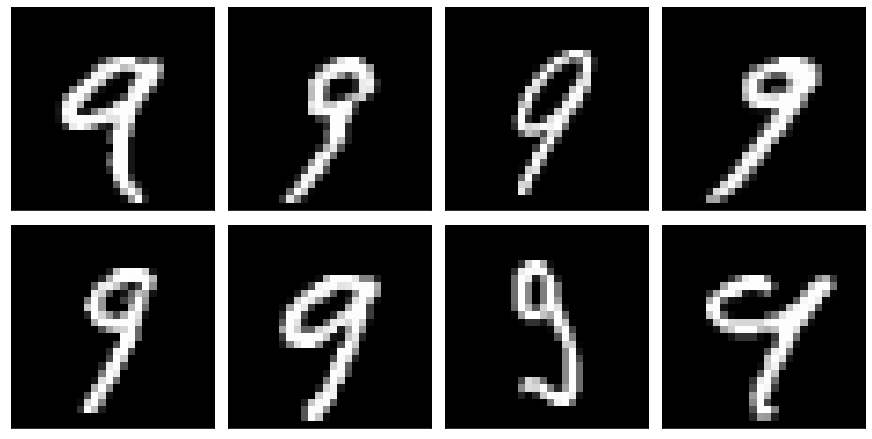

In [140]:
function_results_10(x_train, index_train[9][0][0:nPlot], nRow, nCol)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

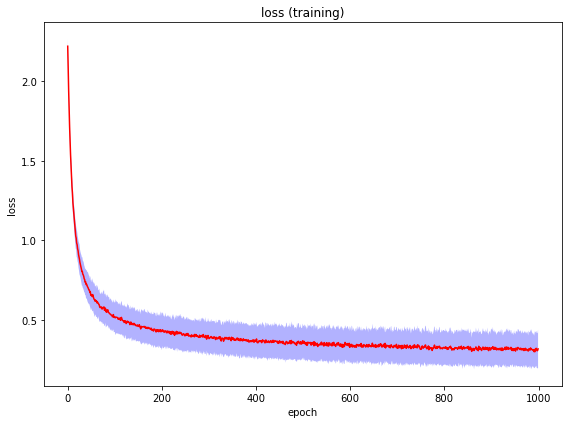

In [142]:
function_results_11(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

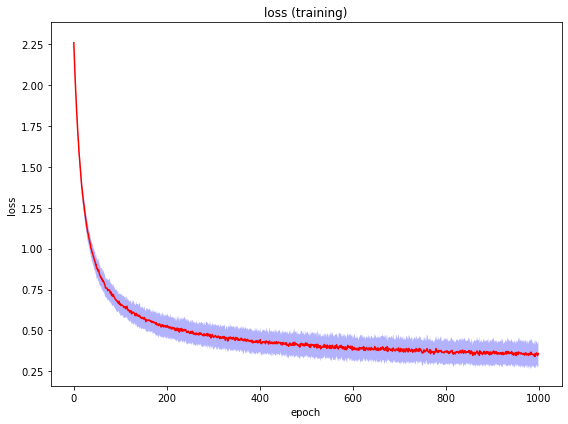

In [148]:
function_results_12(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

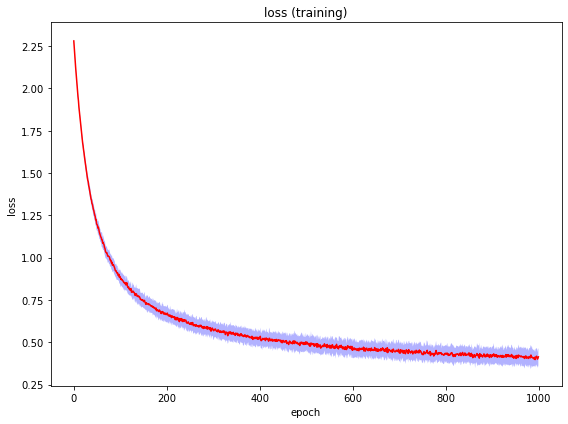

In [150]:
function_results_13(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

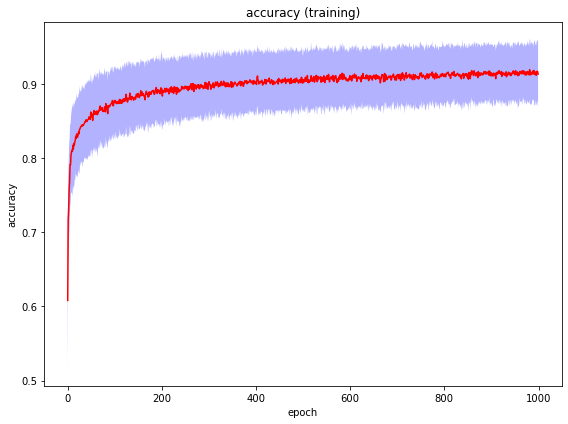

In [155]:
function_results_14(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

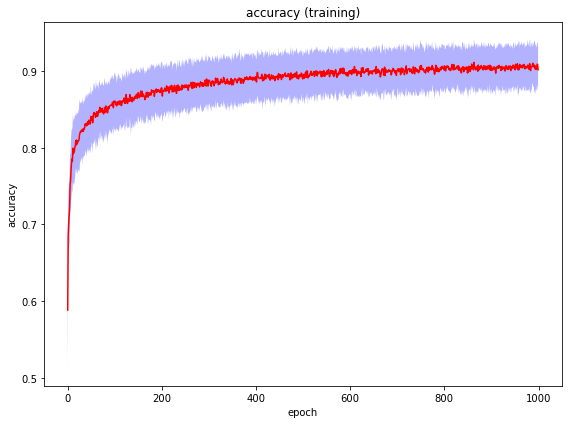

In [156]:
function_results_15(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

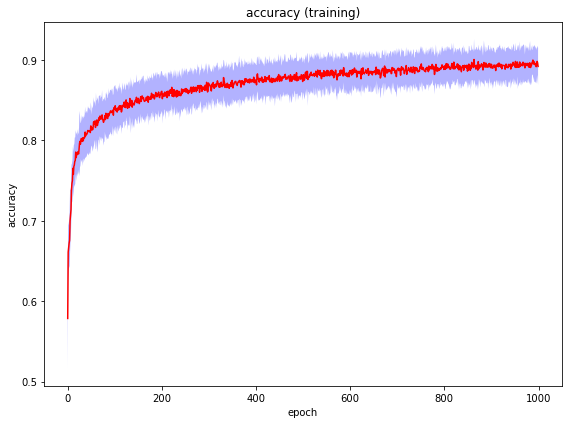

In [157]:
function_results_16(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## # 17. plot loss (testing) curve (mean) with different mini-batch

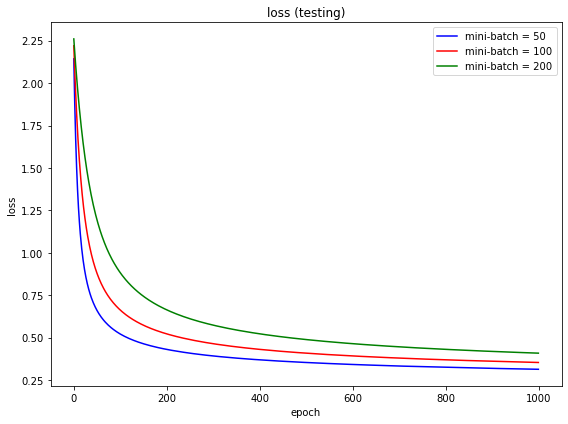

In [164]:
function_results_17(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

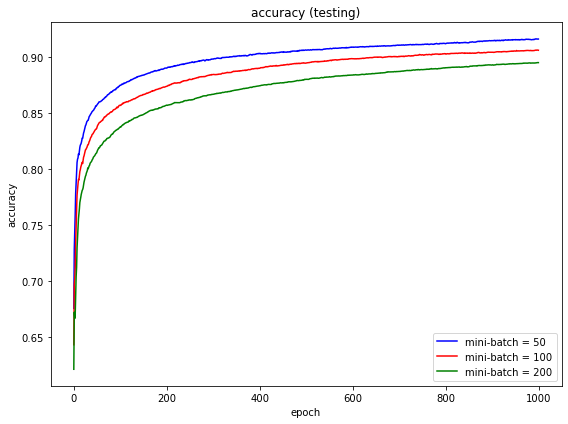

In [165]:
function_results_18(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## # 19. plot loss (testing) curve (mean) with different weight-decay

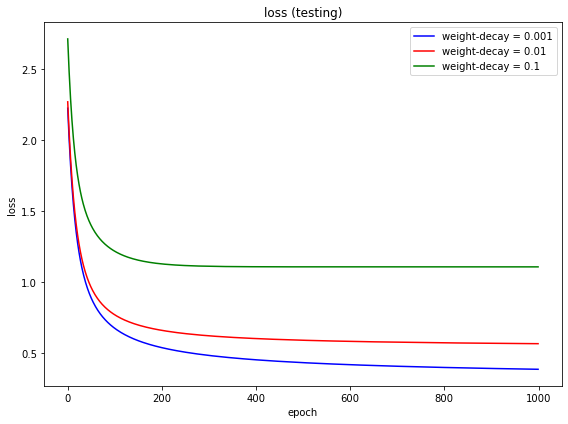

In [166]:
function_results_19(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

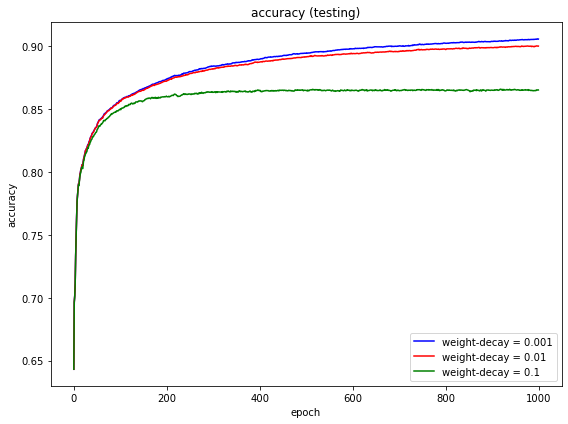

In [167]:
function_results_20(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_21(...)

## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_22(...)

## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_23(...)

## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_24(...)